## Imports of utility functions we will be using
below we import the work for our residual network and deep hybrid scatter network

In [7]:
import sys
import os
sys.path.append('/home/ubuntu/feature_viz/resnet')
sys.path.append('/home/ubuntu/feature_viz/ScatteringTransform/src/model')
from flags import define_flags as scatternet_define_flags
from train_mnist import train_model as scatternet_train
from res_features import train as resnet_train
from visualize import visualize_features
import sklearn
import tensorflow as tf

mnist = tf.contrib.learn.datasets.load_dataset("mnist")

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


# FEATURE EXTRACTION WITH RESIDUAL NETWORK AND FINE TUNING
## Resnet 50 pretrained from the Kth layer and higher
* pretraining Icslvr 2017
* blocks before k are frozen
* classification is done w/ 3 fully connected layers. The first 2 use rectified linear units as acitvation functions while the final layer has a softmax
* features are extracted from the 4th residual block. In the 50 layer residual network this is the block immediately before generating logits for classification.
* an iteration represents a single update on a batch fo 128 images

In [2]:
resnet_classifier = resnet_train(freeze_before_k=3) # all blocks before block k are frozen for training

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Restoring parameters from /home/ubuntu/feature_viz/resnet/resnet_v1_50.ckpt
iter 0 train accuracy: 0.125
iter 100 test accuracy: 0.7699999809265137
EPOCH:  0
saving after 100 iterations
iter 100 train accuracy: 0.7890625
iter 200 test accuracy: 0.9300000071525574
EPOCH:  0
saving after 200 iterations
iter 200 train accuracy: 0.890625
iter 300 test accuracy: 0.8399999737739563
EPOCH:  0
saving after 300 iterations
iter 300 train accuracy: 0.9140625
iter 400 test accuracy: 0.8799999952316284
EPOCH:  0
saving after 400 iterations
iter 400 train accuracy: 0.8046875
iter 500 test accuracy: 0.9700000286102295
EPOCH:  1
saving after 500 iterations
iter 500 train accuracy: 0.9375
iter 600 test accuracy: 0.949999988079071
EPOCH:  1
saving a

# FEATURE EXTRACTION WITH SCATTER NETWORK
## Scatternet Training and Testing on MNIST
The work for scatternet was mostly based off the work done by [tdeboissiere](https://github.com/tdeboissiere) found [here](https://github.com/tdeboissiere/DeepLearningImplementations/tree/master/ScatteringTransform). This scatter network is actually a bit different than the scatter network found in Brunna & Mallat's work. What we analyze here is  a deep hybrid scatter network. We use scatter transforms similar to those found in [Brunna & Mallat's work](https://arxiv.org/abs/1203.1513) followed by a few convolutional layers and fully connected layers. A detailed explanation of how this works can be found in Oyallon's [Deep Hybrid Networks paper](https://arxiv.org/abs/1703.08961).

In [3]:
scatternet_define_flags() 
scatternet_classifier = scatternet_train()  # no pretrained weights for the hybrid scatter net so we do not need to specify a k


Setting up TF session:

Configuring directories:
[Deleting] /home/ubuntu/feature_viz/ScatteringTransform/src/logs
[Deleting] /home/ubuntu/feature_viz/ScatteringTransform/src/models
[Deleting] /home/ubuntu/feature_viz/ScatteringTransform/src/figures
[Creating] /home/ubuntu/feature_viz/ScatteringTransform/src/logs
[Creating] /home/ubuntu/feature_viz/ScatteringTransform/src/models
[Creating] /home/ubuntu/feature_viz/ScatteringTransform/src/figures
Extracting /home/ubuntu/feature_viz/ScatteringTransform/src/data/raw/train-images-idx3-ubyte.gz
Extracting /home/ubuntu/feature_viz/ScatteringTransform/src/data/raw/train-labels-idx1-ubyte.gz
Extracting /home/ubuntu/feature_viz/ScatteringTransform/src/data/raw/t10k-images-idx3-ubyte.gz
Extracting /home/ubuntu/feature_viz/ScatteringTransform/src/data/raw/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Summary name HCNN/CONV2D/conv2d/w:0 is illegal; using HCNN/CONV2D/conv2d/w_0 instead.
INFO:tensorflow:Summary name HCNN/CONV2D/conv2d/b:0 is illegal; us

Epoch 0:   0%|          | 0/30 [00:00<?, ?it/s]
Epoch 0: - train loss: 2.50 val loss: 2.46 - train acc: 0.03 val acc: 0.05:   0%|          | 0/30 [00:03<?, ?it/s]
Epoch 0: - train loss: 2.50 val loss: 2.46 - train acc: 0.03 val acc: 0.05:   3%|▎         | 1/30 [00:03<01:36,  3.33s/it]
Epoch 0: - train loss: 2.46 val loss: 2.45 - train acc: 0.05 val acc: 0.07:   3%|▎         | 1/30 [00:03<01:46,  3.66s/it]
Epoch 0: - train loss: 2.48 val loss: 2.46 - train acc: 0.02 val acc: 0.07:   3%|▎         | 1/30 [00:03<01:54,  3.96s/it]
Epoch 0: - train loss: 2.48 val loss: 2.46 - train acc: 0.02 val acc: 0.07:  10%|█         | 3/30 [00:03<00:35,  1.32s/it]
Epoch 0: - train loss: 2.38 val loss: 2.43 - train acc: 0.09 val acc: 0.08:  10%|█         | 3/30 [00:04<00:38,  1.42s/it]
Epoch 0: - train loss: 2.40 val loss: 2.37 - train acc: 0.09 val acc: 0.08:  10%|█         | 3/30 [00:04<00:40,  1.52s/it]
Epoch 0: - train loss: 2.40 val loss: 2.37 - train acc: 0.09 val acc: 0.08:  17%|█▋        | 5/30 [

Epoch 1: - train loss: 2.09 val loss: 2.08 - train acc: 0.37 val acc: 0.43:  40%|████      | 12/30 [00:04<00:06,  2.88it/s]
Epoch 1: - train loss: 2.09 val loss: 2.08 - train acc: 0.37 val acc: 0.43:  47%|████▋     | 14/30 [00:04<00:04,  3.36it/s]
Epoch 1: - train loss: 2.07 val loss: 2.06 - train acc: 0.38 val acc: 0.42:  47%|████▋     | 14/30 [00:04<00:05,  3.12it/s]
Epoch 1: - train loss: 2.01 val loss: 2.03 - train acc: 0.48 val acc: 0.43:  47%|████▋     | 14/30 [00:04<00:05,  2.94it/s]
Epoch 1: - train loss: 2.01 val loss: 2.03 - train acc: 0.48 val acc: 0.43:  53%|█████▎    | 16/30 [00:04<00:04,  3.35it/s]
Epoch 1: - train loss: 2.06 val loss: 2.05 - train acc: 0.44 val acc: 0.46:  53%|█████▎    | 16/30 [00:05<00:04,  3.16it/s]
Epoch 1: - train loss: 2.03 val loss: 2.01 - train acc: 0.42 val acc: 0.50:  53%|█████▎    | 16/30 [00:05<00:04,  2.99it/s]
Epoch 1: - train loss: 2.03 val loss: 2.01 - train acc: 0.42 val acc: 0.50:  60%|██████    | 18/30 [00:05<00:03,  3.36it/s]
Epoch 1:

Epoch 2: - train loss: 1.76 val loss: 1.66 - train acc: 0.59 val acc: 0.70:  87%|████████▋ | 26/30 [00:08<00:01,  3.22it/s]
Epoch 2: - train loss: 1.75 val loss: 1.76 - train acc: 0.58 val acc: 0.59:  87%|████████▋ | 26/30 [00:08<00:01,  3.10it/s]
Epoch 2: - train loss: 1.75 val loss: 1.76 - train acc: 0.58 val acc: 0.59:  93%|█████████▎| 28/30 [00:08<00:00,  3.34it/s]
Epoch 2: - train loss: 1.72 val loss: 1.70 - train acc: 0.66 val acc: 0.62:  93%|█████████▎| 28/30 [00:08<00:00,  3.23it/s]
Epoch 2: - train loss: 1.69 val loss: 1.66 - train acc: 0.67 val acc: 0.64:  93%|█████████▎| 28/30 [00:08<00:00,  3.12it/s]
Epoch 2: - train loss: 1.69 val loss: 1.66 - train acc: 0.67 val acc: 0.64: 100%|██████████| 30/30 [00:08<00:00,  3.34it/s]
Epoch 3:   0%|          | 0/30 [00:00<?, ?it/s]
Epoch 3: - train loss: 1.66 val loss: 1.70 - train acc: 0.70 val acc: 0.64:   0%|          | 0/30 [00:00<?, ?it/s]
Epoch 3: - train loss: 1.59 val loss: 1.68 - train acc: 0.71 val acc: 0.60:   0%|          | 

Epoch 4: - train loss: 1.43 val loss: 1.37 - train acc: 0.77 val acc: 0.81:  27%|██▋       | 8/30 [00:02<00:08,  2.71it/s]
Epoch 4: - train loss: 1.43 val loss: 1.37 - train acc: 0.77 val acc: 0.81:  33%|███▎      | 10/30 [00:02<00:05,  3.38it/s]
Epoch 4: - train loss: 1.42 val loss: 1.29 - train acc: 0.70 val acc: 0.88:  33%|███▎      | 10/30 [00:03<00:06,  3.08it/s]
Epoch 4: - train loss: 1.48 val loss: 1.41 - train acc: 0.68 val acc: 0.72:  33%|███▎      | 10/30 [00:03<00:07,  2.83it/s]
Epoch 4: - train loss: 1.48 val loss: 1.41 - train acc: 0.68 val acc: 0.72:  40%|████      | 12/30 [00:03<00:05,  3.39it/s]
Epoch 4: - train loss: 1.40 val loss: 1.53 - train acc: 0.73 val acc: 0.65:  40%|████      | 12/30 [00:03<00:05,  3.12it/s]
Epoch 4: - train loss: 1.36 val loss: 1.32 - train acc: 0.77 val acc: 0.80:  40%|████      | 12/30 [00:04<00:06,  2.90it/s]
Epoch 4: - train loss: 1.36 val loss: 1.32 - train acc: 0.77 val acc: 0.80:  47%|████▋     | 14/30 [00:04<00:04,  3.38it/s]
Epoch 4: 

Epoch 5: - train loss: 1.15 val loss: 1.12 - train acc: 0.81 val acc: 0.82:  73%|███████▎  | 22/30 [00:06<00:02,  3.22it/s]
Epoch 5: - train loss: 1.14 val loss: 1.14 - train acc: 0.81 val acc: 0.78:  73%|███████▎  | 22/30 [00:07<00:02,  3.08it/s]
Epoch 5: - train loss: 1.14 val loss: 1.14 - train acc: 0.81 val acc: 0.78:  80%|████████  | 24/30 [00:07<00:01,  3.36it/s]
Epoch 5: - train loss: 1.09 val loss: 1.05 - train acc: 0.82 val acc: 0.84:  80%|████████  | 24/30 [00:07<00:01,  3.23it/s]
Epoch 5: - train loss: 1.14 val loss: 1.10 - train acc: 0.82 val acc: 0.80:  80%|████████  | 24/30 [00:07<00:01,  3.11it/s]
Epoch 5: - train loss: 1.14 val loss: 1.10 - train acc: 0.82 val acc: 0.80:  87%|████████▋ | 26/30 [00:07<00:01,  3.37it/s]
Epoch 5: - train loss: 1.12 val loss: 1.12 - train acc: 0.80 val acc: 0.84:  87%|████████▋ | 26/30 [00:08<00:01,  3.25it/s]
Epoch 5: - train loss: 1.05 val loss: 1.19 - train acc: 0.84 val acc: 0.73:  87%|████████▋ | 26/30 [00:08<00:01,  3.14it/s]
Epoch 5:

Epoch 7: - train loss: 0.88 val loss: 0.85 - train acc: 0.91 val acc: 0.87:  13%|█▎        | 4/30 [00:01<00:11,  2.26it/s]
Epoch 7: - train loss: 0.88 val loss: 0.85 - train acc: 0.91 val acc: 0.87:  20%|██        | 6/30 [00:01<00:07,  3.38it/s]
Epoch 7: - train loss: 0.96 val loss: 0.92 - train acc: 0.83 val acc: 0.84:  20%|██        | 6/30 [00:02<00:08,  2.90it/s]
Epoch 7: - train loss: 0.99 val loss: 0.83 - train acc: 0.84 val acc: 0.91:  20%|██        | 6/30 [00:02<00:09,  2.52it/s]
Epoch 7: - train loss: 0.99 val loss: 0.83 - train acc: 0.84 val acc: 0.91:  27%|██▋       | 8/30 [00:02<00:06,  3.35it/s]
Epoch 7: - train loss: 0.88 val loss: 0.84 - train acc: 0.89 val acc: 0.86:  27%|██▋       | 8/30 [00:02<00:07,  2.96it/s]
Epoch 7: - train loss: 0.90 val loss: 0.85 - train acc: 0.87 val acc: 0.86:  27%|██▋       | 8/30 [00:02<00:08,  2.68it/s]
Epoch 7: - train loss: 0.90 val loss: 0.85 - train acc: 0.87 val acc: 0.86:  33%|███▎      | 10/30 [00:02<00:05,  3.34it/s]
Epoch 7: - trai

Epoch 8: - train loss: 0.72 val loss: 0.78 - train acc: 0.85 val acc: 0.87:  60%|██████    | 18/30 [00:05<00:03,  3.12it/s]
Epoch 8: - train loss: 0.81 val loss: 0.72 - train acc: 0.84 val acc: 0.88:  60%|██████    | 18/30 [00:06<00:04,  2.97it/s]
Epoch 8: - train loss: 0.81 val loss: 0.72 - train acc: 0.84 val acc: 0.88:  67%|██████▋   | 20/30 [00:06<00:03,  3.30it/s]
Epoch 8: - train loss: 0.72 val loss: 0.69 - train acc: 0.89 val acc: 0.88:  67%|██████▋   | 20/30 [00:06<00:03,  3.14it/s]
Epoch 8: - train loss: 0.72 val loss: 0.78 - train acc: 0.87 val acc: 0.87:  67%|██████▋   | 20/30 [00:06<00:03,  3.00it/s]
Epoch 8: - train loss: 0.72 val loss: 0.78 - train acc: 0.87 val acc: 0.87:  73%|███████▎  | 22/30 [00:06<00:02,  3.30it/s]
Epoch 8: - train loss: 0.72 val loss: 0.70 - train acc: 0.88 val acc: 0.88:  73%|███████▎  | 22/30 [00:06<00:02,  3.16it/s]
Epoch 8: - train loss: 0.64 val loss: 0.62 - train acc: 0.95 val acc: 0.91:  73%|███████▎  | 22/30 [00:07<00:02,  3.03it/s]
Epoch 8:

Finished training!


# FEATURE VISUALIZATION
Sample some data points from MNIST to map to a feature space with both of our classifiers. Once we have both of these new feature spaces we can use TSNE to reduce dimensionality to a space easily visualized.

In [4]:
x_viz, y_viz = mnist.test.next_batch(1280)

## TSNE on 50 layer residual network features
Looks like we are forming some clusters of each of the classes however there is heavy overlap. For example 2, 3, 5, and 8 all have clusters that that appear in roughly the same space.

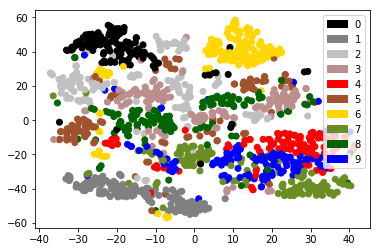

In [5]:
resnet_features_viz = resnet_classifier.get_features(x_viz)
visualize_features(resnet_features_viz, y_viz, 'resnet50')

## TSNE on Deep Hybrid Network
Class separation is much stronger here than we experienced in our 50 layer residual network. I am guessing this is because the Deep Hybrid Network allowed for all the weights to be trained. While we froze all the weights and biases below the 3rd block of the resnet.

In [ ]:
scatternet_features_viz = scatternet_classifier.get_features(x_viz)
visualize_features(scatternet_features_viz, y_viz, 'scatternet')

# IMAGAGE CLASSIFICATION COMPARISON
## Multilayer Neural Network vs. Logistic Regression vs. Support Vector Machine

In [ ]:
def logistic_regression(train_features, train_labels, test_features, test_labels):
    lm = sklearn.linear_model.Logistic_Regression(multi_class='multinomial')
    lm.fit(train_features, train_labels)
    score = lm.score(test_features, test_labels)
    return score

def support_vector_machine(train_features, train_labels, test_features, test_labels):
    svm = sklearn.svm.SVC()
    svm.fit(train_features, train_labels)
    score = svm.score(test_features, test_labels)
    return score

In [ ]:
x_train, y_train = mnist.train.next_batch(1280)
scatternet_features_train = scatternet_classifier.get_features(x_train)
resnet_features_train = resnet_classifier.get_features(x_train)

lm_res_score = logistic_regression(resnet_features, y_train, resnet_features_viz, y_viz)
svm_res_score = support_vector_machine(resnet_features, y_train, resnet_features_viz, y_viz)

lm_scatternet_score = logistic_regression(scatternet_features, y_train, scatternet_features_viz, y_viz)
svm_scatternet_score = support_vector_machine(scatternet_features, y_train, scatternet_features_viz, y_viz)